In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('file.csv')     #loading the file in data

In [3]:
data = df.head(6000)

In [4]:
data.head()      #Viewing the first 5 rows of the dataframe

,customer.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,LA001,Yes,debt_consolidation,11.89%,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,Less than 5,No,Yes
1,LA002,Yes,credit_card,10.71%,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,Less than 5,No,Yes
2,LA003,Yes,debt_consolidation,13.57%,366.86,10.373491,11.63,682,4710.000000,3511,25.6,0,Less than 5,No,Yes
3,LA004,Yes,debt_consolidation,10.08%,162.34,11.350407,8.10,712,2699.958333,33667,73.2,0,Less than 5,No,Yes
4,LA005,Yes,credit_card,14.26%,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,Less than 5,Yes,Yes


In [5]:
X = data.drop(columns=['customer.id','paid.back.loan'])
y = data['paid.back.loan']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)#Splitting the dataframe into Features and Target

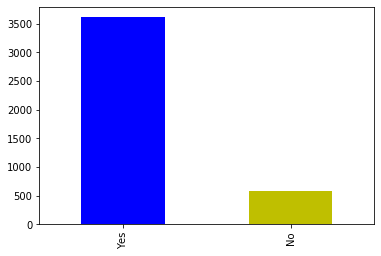

In [6]:
fully_paid = y_train.value_counts()             #Storing value counts of target variable in 'fully_paid'
fully_paid.plot(kind='bar',color=('b','y'))     #Plotting the borrowers who paid back the loan and not paid back the loan
plt.show()

In [7]:
X_train['int.rate'] = X_train['int.rate'].map(lambda x: str(x)[:-1])      #Removing the last character from the values in column
X_train['int.rate']=X_train['int.rate'].astype(float)/100                 #Dividing the column values by 100
X_test['int.rate'] = X_test['int.rate'].map(lambda x: str(x)[:-1])        #Removing the last character from the values in column
X_test['int.rate']=X_test['int.rate'].astype(float)/100                   #Dividing the column values by 100
num_df=X_train.select_dtypes(include=['number']).copy()                   #Storing all the numerical type columns in 'num_df'
cat_df=X_train.select_dtypes(include=['object']).copy()                   #Storing all the categorical type columns in 'cat_df'

<Figure size 1440x1440 with 0 Axes>

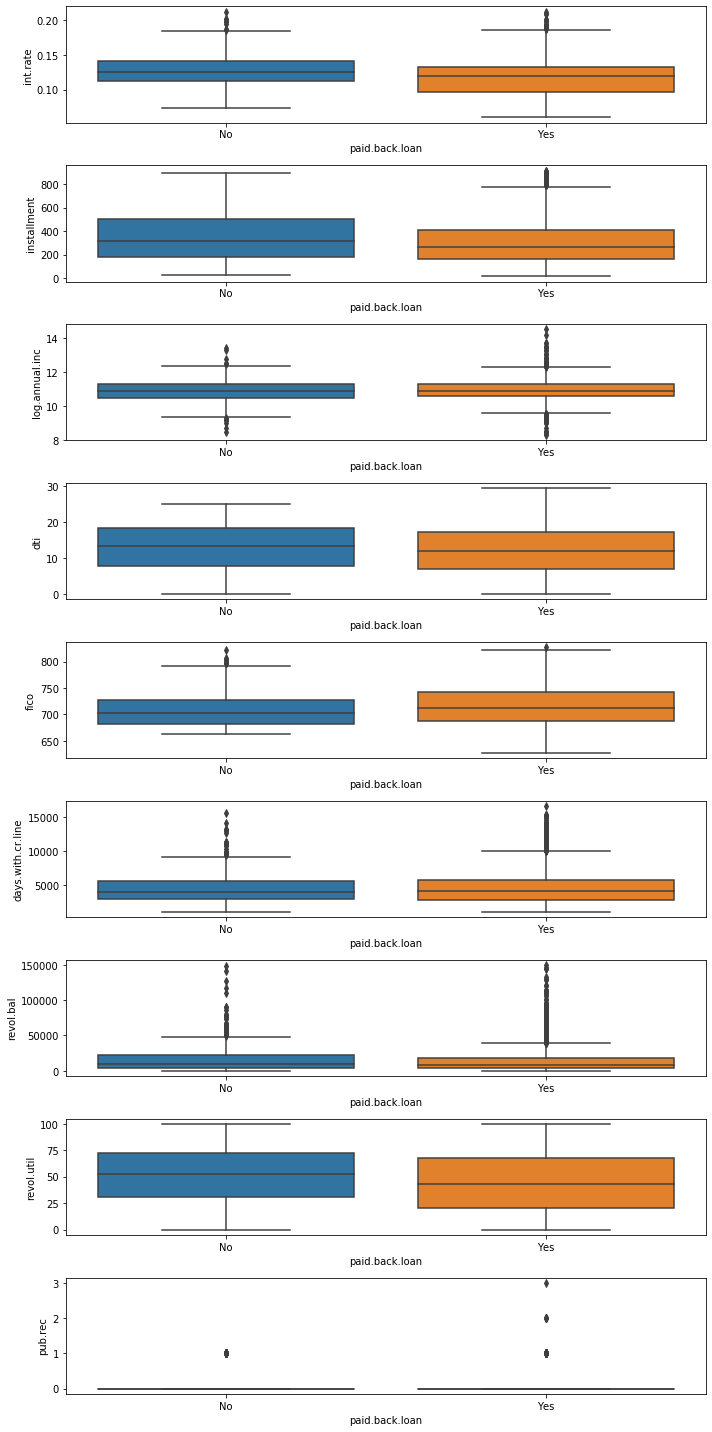

In [8]:
plt.figure(figsize=(20,20))
cols=list(num_df.columns)                                   #Storing the columns of 'num_df'
fig,axes=plt.subplots(9,1, figsize=(10,20))
for i in range(9):                                          #Looping across rows
    sns.boxplot(x=y_train,y=num_df[cols[i]],ax=axes[i])     #Plotting boxplot
    fig.tight_layout()                                      #Avoiding subplots overlapping

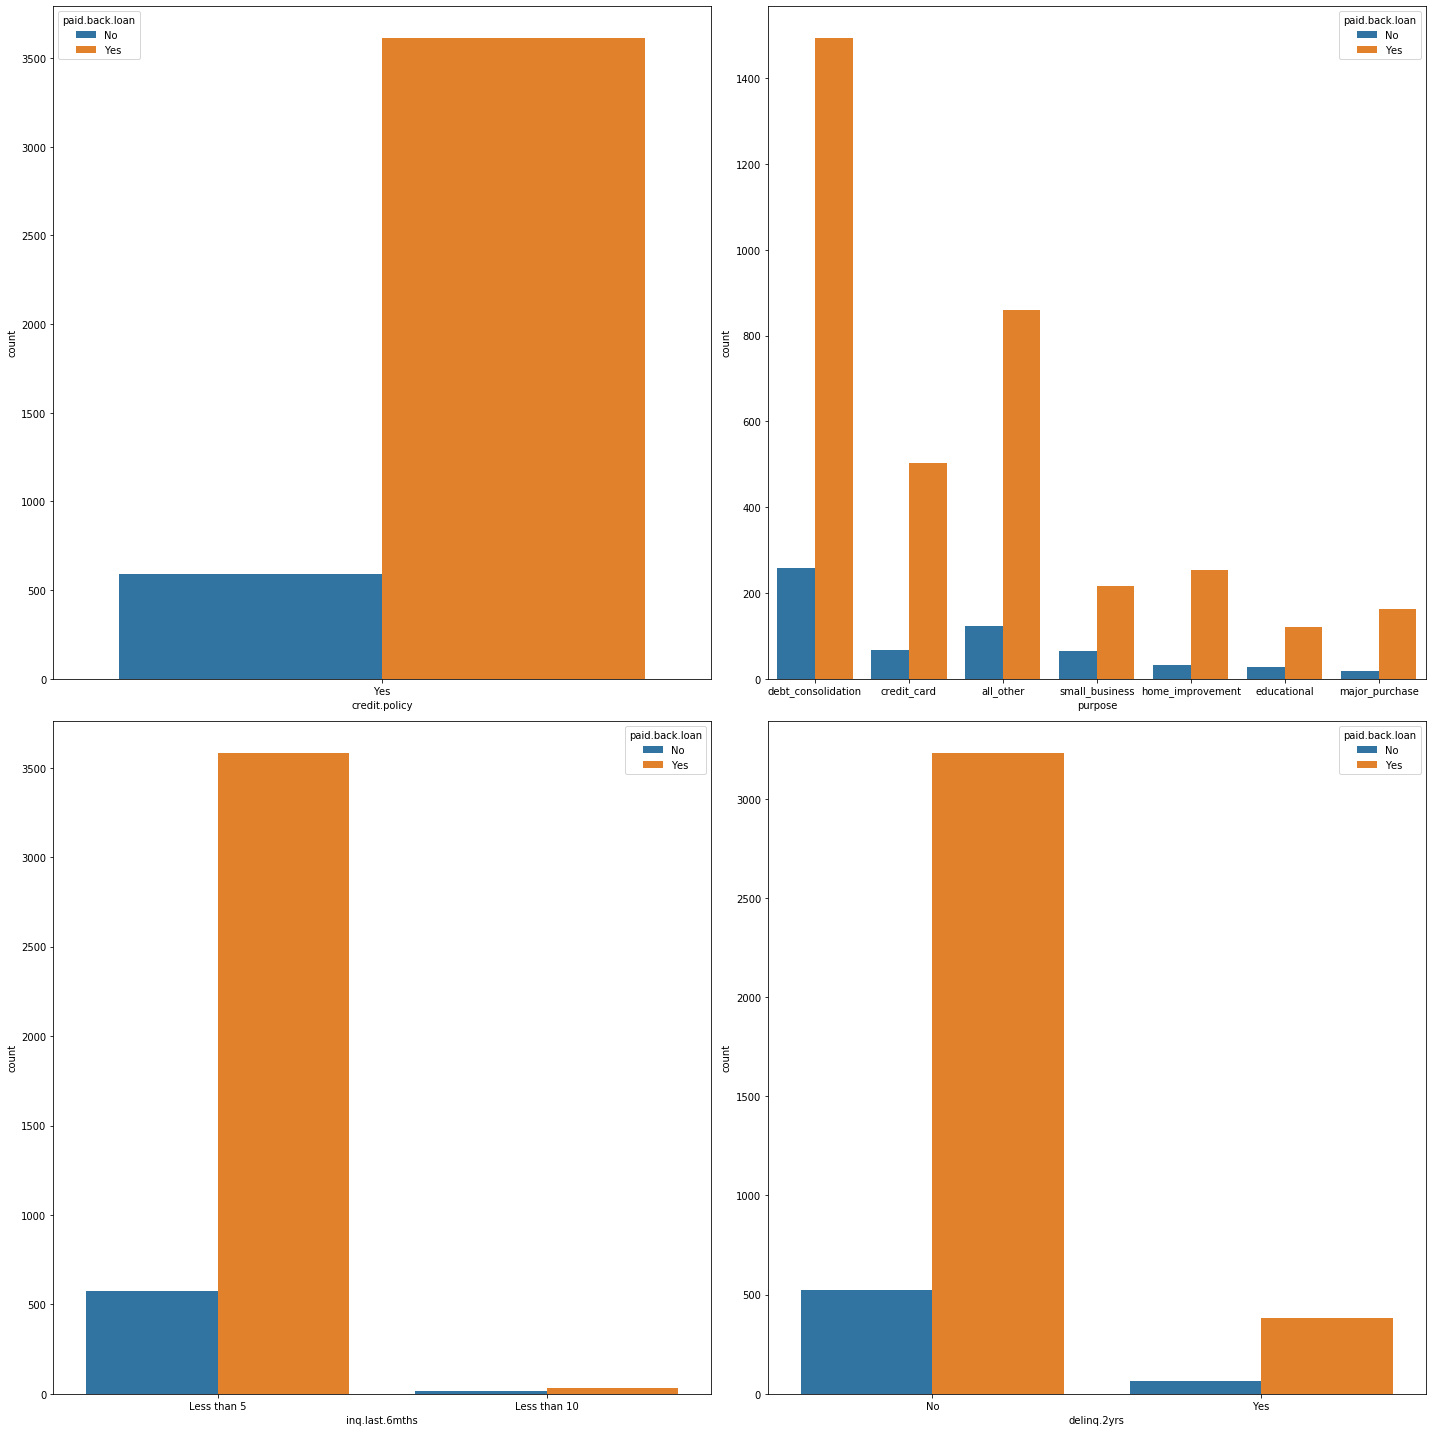

In [9]:
cols=list(cat_df.columns)                                                        #Storing the columns of 'cat_df'
fig,axes=plt.subplots(2,2, figsize=(20,20))
for i in range(0,2):                                                             #Looping through rows
    for j in range(0,2):                                                         #Looping through columns
        sns.countplot(x=X_train[cols[i*2+j]], hue=y_train,ax=axes[i,j])          #Plotting count plot
        fig.tight_layout()                                                       #Avoiding subplots overlapping

In [10]:
for col in cat_df.columns:                                 #Looping through categorical columns
    X_train[col].fillna('NA',inplace=True)                 #Filling null values with 'NA'
    le=LabelEncoder()                                      #Initalising a label encoder object
    X_train[col]=le.fit_transform(X_train[col])            #Fitting and transforming the column in X_train with 'le'
    X_test[col].fillna('NA',inplace=True)                  #Filling null values with 'NA'
    X_test[col]=le.transform(X_test[col])                  #Fitting the column in X_test with 'le'
y_train.replace({'No':0,'Yes':1},inplace=True)             # Replacing the values of y_train
y_test.replace({'No':0,'Yes':1},inplace=True)              # Replacing the values of y_test

In [11]:
model=DecisionTreeClassifier(criterion="entropy",random_state=6,max_depth=3,min_samples_leaf=100)            #Initialising 'Decision Tree' model
model.fit(X_train, y_train)                             #Training the 'Decision Tree' model
y_pred = model.predict(X_test)                          #Predicting the 'Decision Tree' model
acc=model.score(X_test, y_test)                         #Finding the accuracy of 'Decision Tree' model
print(f'Accuracy : {round(acc*100,2)}%')                #Printing the accuracy

Accuracy : 87.28%


In [12]:
result=confusion_matrix(y_test,y_pred)                 #Finding the Confusion Matrix
print('Confusion Matrix :\n',result)

Confusion Matrix :
 [[   0  229]
 [   0 1571]]


In [13]:
Knn = KNeighborsClassifier()                                   #Initialising KNeighboursClassifier Model
Knn.fit(X_train,y_train)                                       #Training the KNeighboursClassifier Model
y_pred = Knn.predict(X_test)                                   #Predicting the values
score = metrics.accuracy_score(y_test , y_pred)                #Calculating score based on prediction
print(f'Accuracy : {round(score*100,2)}%')

Accuracy : 85.78%


In [14]:
Knn.fit(X_train,y_train)                                       #Initialising KNeighboursClassifier Model
classes = {0:'No',1:'Yes'}                                     #Defining the Class
x_new=[[0,3,9.33,798,11.5,1.57,762,6359,17,0.1,0,0,0]]         #New Test Data
y_predict = Knn.predict(x_new)                                 #Predicting the Class
print(classes[y_predict[0]])

Yes


In [15]:
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}   #Initialising the parameter grid model
model_2 = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")       #Initialising 'Decision Tree' model
p_tree = GridSearchCV(model_2, parameter_grid, cv=5)                                   #Initialising 'Grid Search' model
p_tree.fit(X_train, y_train)                                                           #Training the 'Grid Search' model
y_pred_2 = p_tree.predict(X_test)                                                      #Predicting the 'Grid Search' model
acc_2 = p_tree.score(X_test, y_test)                                                   #Finding the accuracy
print(f'Accuracy : {round(acc_2*100,2)}%')                                             #Printing the accuracy

Accuracy : 87.28%


In [16]:
cr = data.corr()           #Correlation among columns
cr

,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec
installment,1.000000,0.403897,0.047521,0.018466,0.128669,0.261472,0.100778,-0.033204
log.annual.inc,0.403897,1.000000,-0.101343,0.072916,0.291763,0.423011,0.061862,0.014247
dti,0.047521,-0.101343,1.000000,-0.271182,0.003395,0.239897,0.338524,-0.002360
fico,0.018466,0.072916,-0.271182,1.000000,0.248942,-0.078318,-0.580985,-0.146767
days.with.cr.line,0.128669,0.291763,0.003395,0.248942,1.000000,0.229000,-0.040669,0.060161
revol.bal,0.261472,0.423011,0.239897,-0.078318,0.229000,1.000000,0.346695,-0.038622
revol.util,0.100778,0.061862,0.338524,-0.580985,-0.040669,0.346695,1.000000,0.065867
pub.rec,-0.033204,0.014247,-0.002360,-0.146767,0.060161,-0.038622,0.065867,1.000000


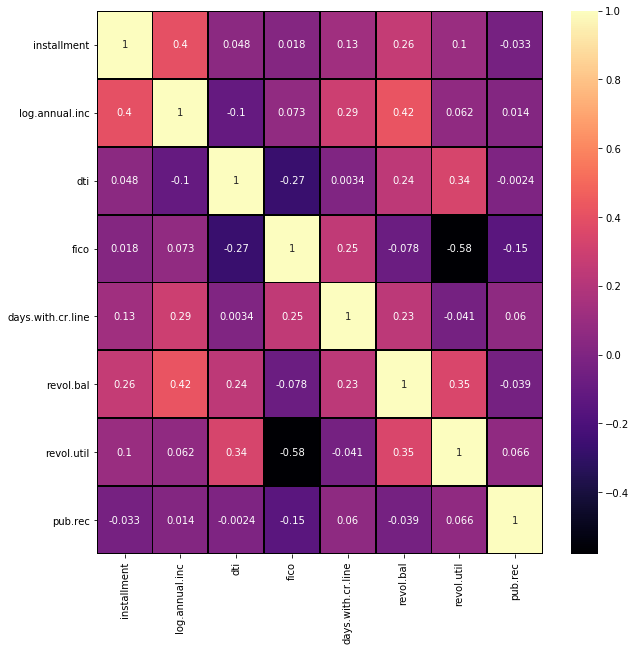

In [17]:
fig, ax = plt.subplots(figsize=(10,10))         #Heat Map of Correlation among Columns
sns.heatmap(data.corr(),annot=True,cmap ='magma', linecolor ='black', ax=ax,linewidths = 1)

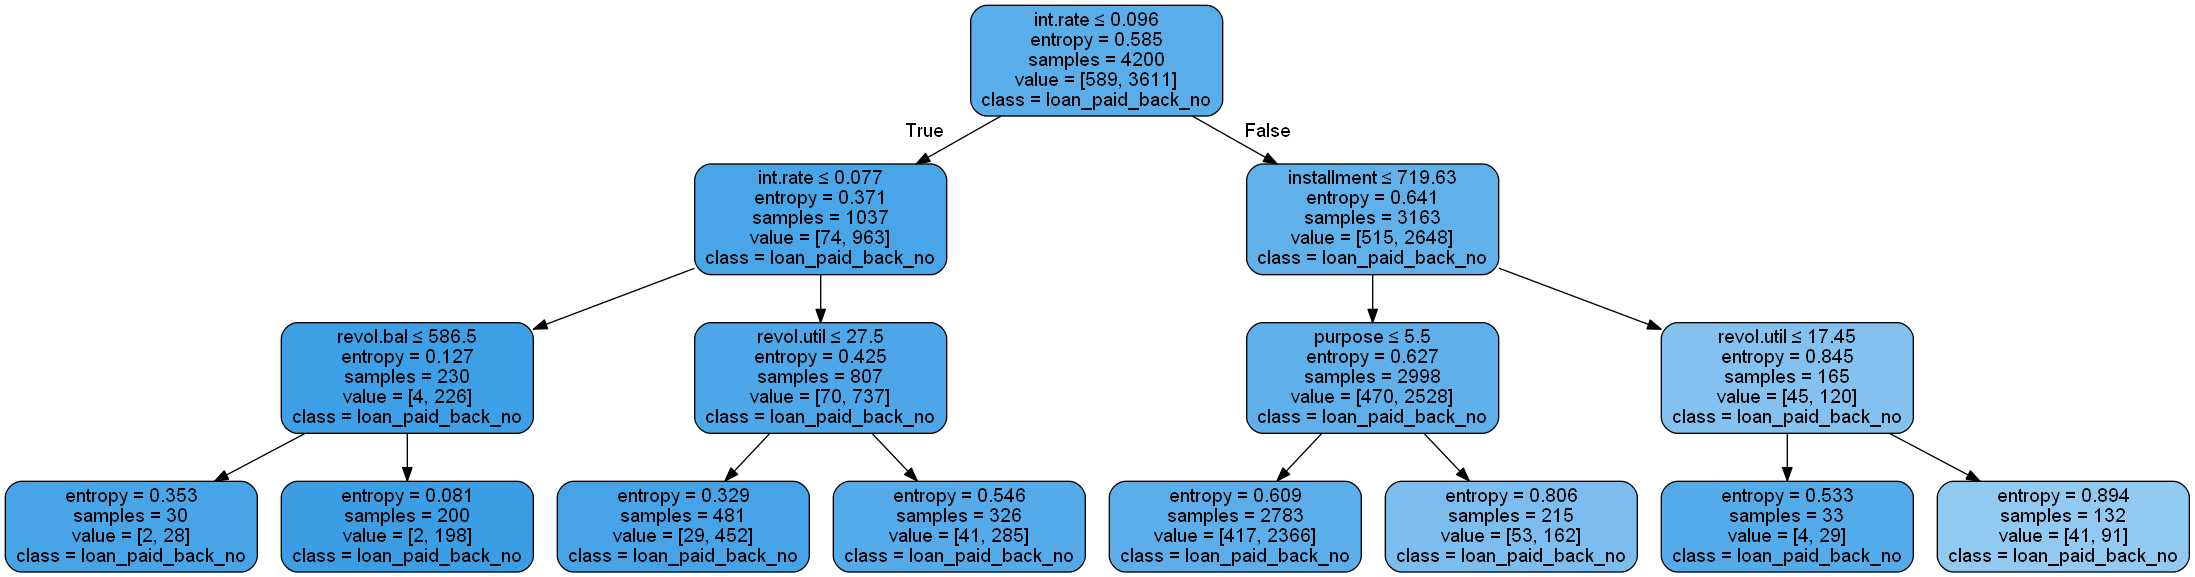

In [18]:
dot_data = StringIO()                                #Visualising The Decision Tree
export_graphviz(decision_tree=p_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['loan_paid_back_yes','loan_paid_back_no'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('file.png')
Image(graph.create_png())